# Results on the ZINC dataset

In [2]:
# tensorflow backend
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
import numpy as np
import pandas as pd
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Using TensorFlow backend.


In [3]:
vae = VAEUtils(directory='../models/zinc')

From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:432: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3535: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:113: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1210: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2878: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:154: The name tf.get_default_

Using standarized functions? True
Standarization: estimating mu and std values ...done!


### Figure 2: Representations of the sampling results from the variational autoencoder

a) Kernel Density Estimation (KDE) of each latent dimension of the autoencoder, i.e., the distribution of encoded molecules along each dimension of our latent space representation

![](../aux_data/fig2a.PNG)


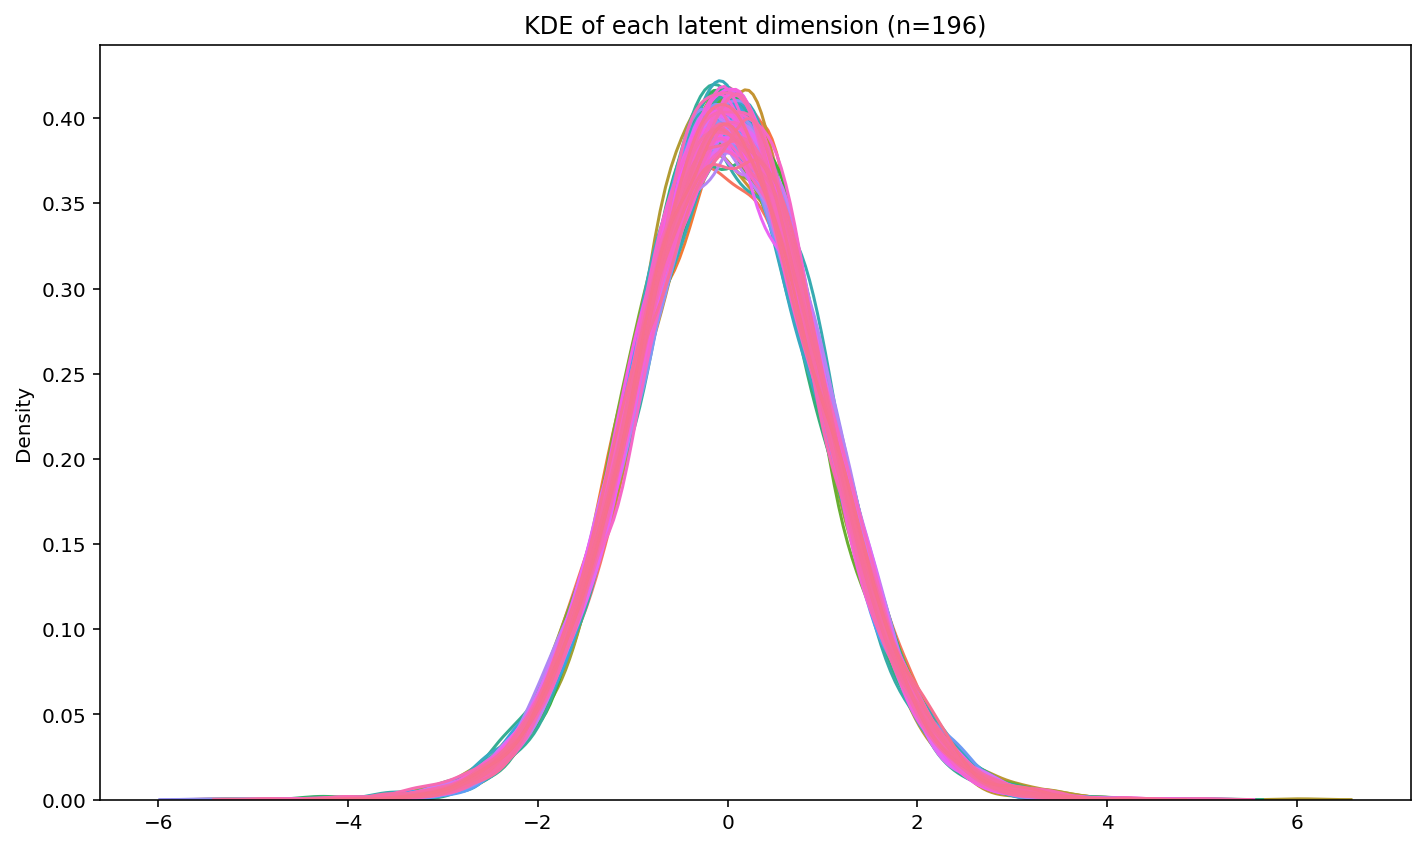

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# encode 5000 random molecules and plot a kernel density estimate of their latent representation
# to show that the latent variables follow a gaussian distribution
# TODO: the paper encodes molecules from outside the training set

rand_5000_molecules = vae.random_molecules(size=5000)
X_rand_5000_molecules = vae.smiles_to_hot(rand_5000_molecules,canonize_smiles=True)
z_rand_5000_molecules = vae.encode(X_rand_5000_molecules)

# Set up the plotting environment
plt.figure(figsize=(10, 6))

# For each dimension in the data, compute and plot the KDE
for dim in range(z_rand_5000_molecules.shape[1]):
    sns.kdeplot(z_rand_5000_molecules[:, dim], legend=False, color=sns.color_palette("husl", 196)[dim])

plt.title('KDE of each latent dimension (n=196)')
#plt.xlabel('Z (unstandardized)')
#plt.ylabel('Normalized Frequency')
plt.tight_layout()
plt.show()

b) histogram of sampled
molecules for a single point in the latent space; the distances of the molecules from the original query are shown by the lines corresponding to the right axis


![](../aux_data/fig2b.PNG)

In [61]:
# no idea which molecule exactly they used for this plot
# it should be a "sample FDA-approved drug molecule"
# here I just picked a random one from the ZINC dataset
molecule = mu.canon_smiles("C[C@@H]1C[C@H]1c1ccc(C[NH+](C)Cc2nnsc2Cl)o1")
print(molecule)
X = vae.smiles_to_hot(molecule,canonize_smiles=True)
z = vae.encode(X)

decode_attempts = 100

Z = np.tile(z, (decode_attempts, 1))
X = vae.decode(Z)
smiles = vae.hot_to_smiles(X, strip=True)
df = vae.prep_mol_df(smiles, z)

print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)

C[C@@H]1C[C@H]1c1ccc(C[NH+](C)Cc2nnsc2Cl)o1


Found 3 unique mols, out of 23
SMILES
 0    C[C@@H]1C[C@H]1c1ccc(C[NH+](C)Cc2nnsc2Cl)o1
1    C[C@@H]1C[C@H]1c1ccc(C[NH+](C)Cc2ncsc2Cl)o1
2    C[C@@H]1C[C@H]1c1ccc(C[C@H](C)Cn2ncnc2Cl)o1
Name: smiles, dtype: object


RDKit ERROR: [19:53:24] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 18
RDKit ERROR: 
RDKit ERROR: [19:53:24] Explicit valence for atom # 11 Cl, 3, is greater than permitted
RDKit ERROR: [19:53:24] Can't kekulize mol.  Unkekulized atoms: 12 13 14 16
RDKit ERROR: 
RDKit ERROR: [19:53:24] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 18
RDKit ERROR: 
RDKit ERROR: [19:53:24] Can't kekulize mol.  Unkekulized atoms: 12 13 14 16
RDKit ERROR: 
RDKit ERROR: [19:53:24] SMILES Parse Error: syntax error while parsing: C[C@@H]1C[C@H]1c1ccc(C[NH+](C)C@2ncsc2Cl)o1
RDKit ERROR: [19:53:24] SMILES Parse Error: Failed parsing SMILES 'C[C@@H]1C[C@H]1c1ccc(C[NH+](C)C@2ncsc2Cl)o1' for input: 'C[C@@H]1C[C@H]1c1ccc(C[NH+](C)C@2ncsc2Cl)o1'


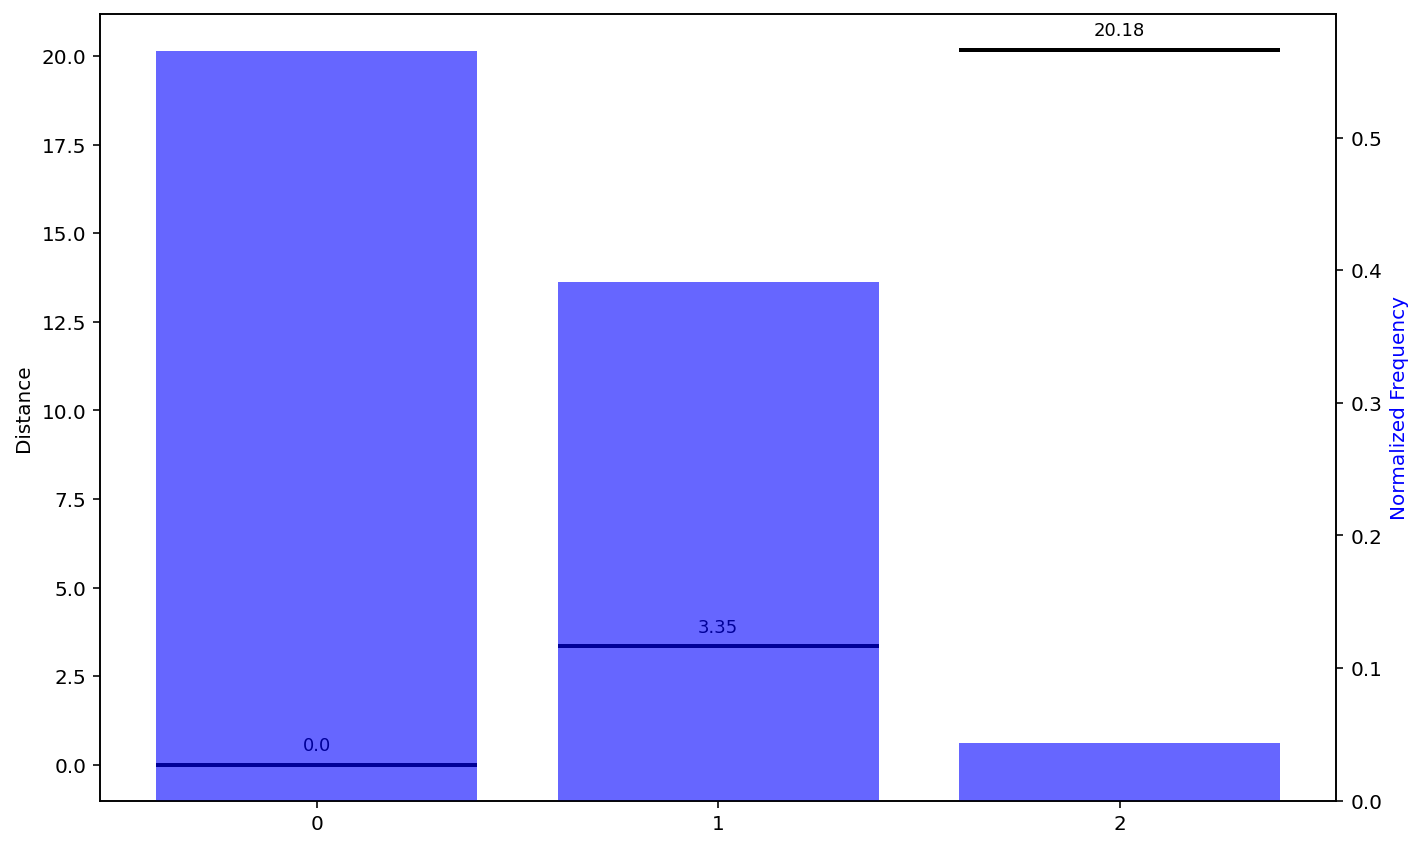

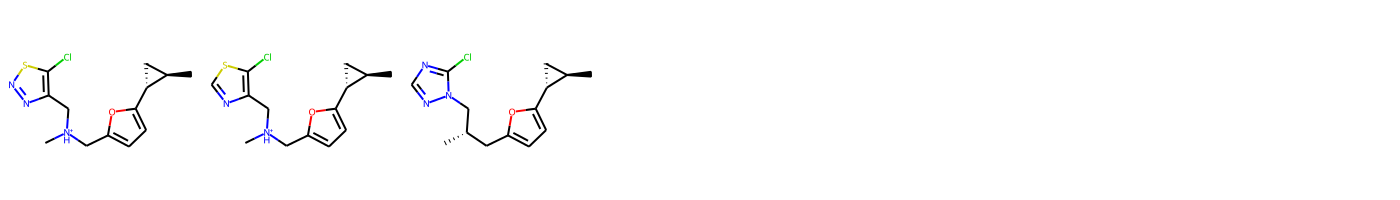

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create a secondary y-axis for the frequency bars
ax2 = ax1.twinx()

# Plot the bar chart using the frequency column on ax2
bars = ax2.bar(df.index, df['frequency'], alpha=0.6, label='Frequency', color='blue')

# Plot horizontal lines representing distance over each bar and annotate the distance value on ax1
for bar, distance in zip(bars, df['distance']):
    ax1.hlines(distance, bar.get_x(), bar.get_x() + bar.get_width(), colors='black', linewidth=2)
    
    # Round the distance value to 2 decimal places
    rounded_distance = round(distance, 2)
    
    # Annotate the rounded distance value
    ax1.annotate(str(rounded_distance),
                 (bar.get_x() + bar.get_width()/2, distance),
                 textcoords="offset points",
                 xytext=(0,5),  # 5 points vertical offset
                 ha='center',
                 va='bottom',
                 fontsize=9,
                 color='black')

# Set the y-axis labels
ax1.set_ylabel('Distance', color='black')
ax2.set_ylabel('Normalized Frequency', color='blue')

# Set the x-axis ticks
ax1.set_xticks(df.index)
ax1.set_xticklabels(df.index)

plt.tight_layout()
plt.show()

display(PandasTools.FrameToGridImage(df,column='mol' , molsPerRow=7))


c) molecules sampled near the location of ibuprofen in latent space. The values below the molecules are the distance in latent space from
the decoded molecule to ibuprofen

![](../aux_data/fig2c.PNG)

In [ ]:
# TODO: replicate results

d) slerp interpolation between two molecules in latent space using six steps of equal distance

![](../aux_data/fig2d.PNG)

In [ ]:
# TODO: replicate results

TODO: figure 3 (PCA analysis)

TODO: table 1 (model without property prediction)

TODO: table 2 (model with property prediction)

TODO: figure 4 (need to implement the gaussian process)